## 1: time step

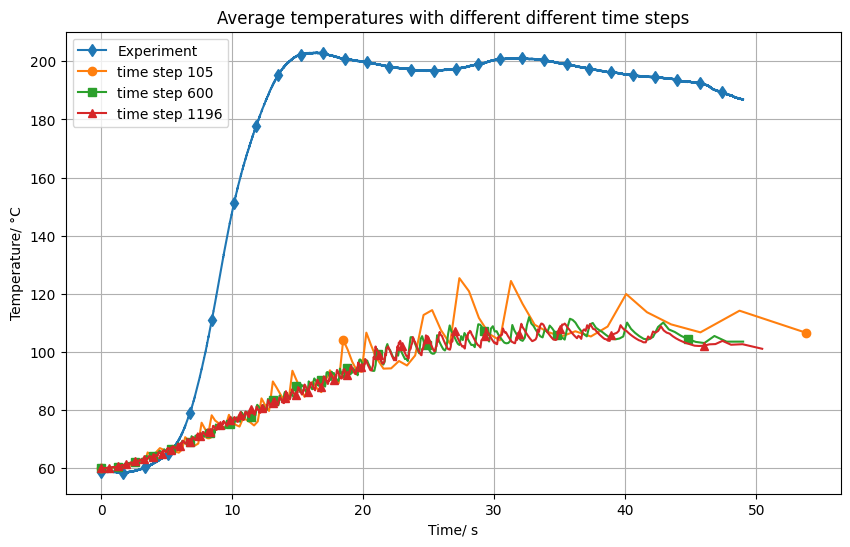

In [28]:
import os
import re
import pandas as pd
import matplotlib.pyplot as plt

# Define the function to extract the folder name from the file name
def extract_elements(file_name):
    match = re.search(r's-(\d+)', file_name)
    if match:
        return int(match.group(1))
    return 0

# Source directory where the folders are located
source_dir = '/home/yanjun/Documents/FEM_results/three_points/time_step'

# List to store DataFrames for each folder
folder_dfs = []

# Iterate through each directory in the source directory
for folder in os.listdir(source_dir):
    folder_path = os.path.join(source_dir, folder)
    # Check if it's a directory
    if os.path.isdir(folder_path):
        # List to store DataFrames for each CSV file in the folder
        dfs = []
        # Iterate through each CSV file in the folder
        for file in os.listdir(folder_path):
            if file.endswith('.csv') and file.split('.')[0].isdigit():
                csv_file = os.path.join(folder_path, file)
                df = pd.read_csv(csv_file)
                # Assuming the CSV files have columns 'Time' and 'temperature'
                dfs.append(df[['Time', 'avg(f)']])
        # Concatenate all DataFrames into one for the folder
        combined_df = pd.concat(dfs)
        # Group by time step and calculate average temperature for each time step
        average_temps_per_timestep = combined_df.groupby('Time')['avg(f)'].mean()
        # Store the average temperatures for the folder
        folder_dfs.append({'Folder': extract_elements(folder), 'Average Temperatures': average_temps_per_timestep})

# Sort folder_dfs by 'Folder' for plotting
folder_dfs.sort(key=lambda x: x['Folder'])


# Plotting
i = 0
marker_styles = ['o', 's', '^', 'v', '>', '<' ] 
plt.figure(figsize=(10, 6))

df1 = pd.read_csv('/home/yanjun/Documents/FEniCSx/Projecct/Data/experiment_result.csv')
T_e_ave = ( df1.iloc[:,1] + df1.iloc[:,3] + df1.iloc[:,5] ) /3
num_total = len(T_e_ave)
t_e = np.linspace (0, 49, num_total)
plt.plot(t_e, T_e_ave, label= "Experiment",marker='d',markevery=1000)

for folder_data in folder_dfs:
    plt.plot(folder_data['Average Temperatures'], label=f'time step {folder_data["Folder"]}', marker= marker_styles[i],markevery=35)
    i = i+1

plt.xlabel('Time/ s')
plt.ylabel('Temperature/ °C')
plt.title('Average temperatures with different different time steps')
plt.legend()
plt.grid(True)
plt.savefig('T_ave_time_step.png')
plt.show()


### 1.1 average temperature

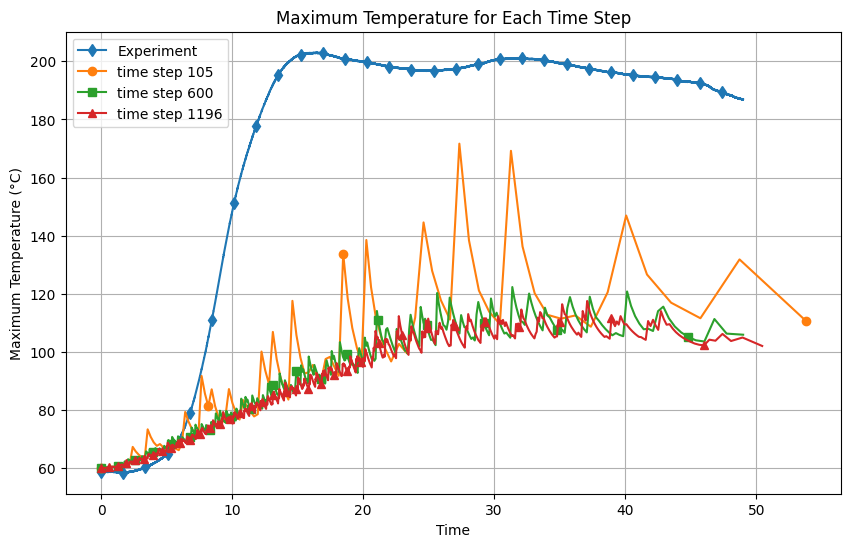

In [27]:
import os
import re
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Define the function to extract the folder name from the file name
def extract_elements(file_name):
    match = re.search(r's-(\d+)', file_name)
    if match:
        return int(match.group(1))
    return 0

# Source directory where the folders are located
source_dir = '/home/yanjun/Documents/FEM_results/three_points/time_step'

# List to store maximum temperatures for each folder
folder_max_temps = []


# Iterate through each directory in the source directory
for folder in os.listdir(source_dir):
    folder_path = os.path.join(source_dir, folder)
    # Check if it's a directory
    if os.path.isdir(folder_path):
        # Read all CSV files in the folder and concatenate them into one DataFrame
        df_list = []
        for file in os.listdir(folder_path):
            if file.endswith('.csv') and file.split('.')[0].isdigit():
                csv_file = os.path.join(folder_path, file)
                df = pd.read_csv(csv_file)
                df_list.append(df)
        combined_df = pd.concat(df_list)
        # Group by 'Time' and find the maximum temperature for each time step
        max_temps_per_timestep = combined_df.groupby('Time')['avg(f)'].max()
        # Store the maximum temperatures for the folder
        folder_max_temps.append({'Folder': extract_elements(folder), 'Max Temperatures': max_temps_per_timestep})

# Sort folder_max_temps by 'Folder' for plotting
folder_max_temps.sort(key=lambda x: x['Folder'])

# Plotting
plt.figure(figsize=(10, 6))

df1 = pd.read_csv('/home/yanjun/Documents/FEniCSx/Projecct/Data/experiment_result.csv')
T_e_ave = ( df1.iloc[:,1] + df1.iloc[:,3] + df1.iloc[:,5] ) /3
num_total = len(T_e_ave)
t_e = np.linspace (0, 49, num_total)
plt.plot(t_e, T_e_ave, label= "Experiment",marker='d',markevery=1000)
i = 0
marker_styles = ['o', 's', '^', 'v', '>', '<' ] 

for folder_data in folder_max_temps:
    plt.plot(folder_data['Max Temperatures'], label=f'time step {folder_data["Folder"]}', marker= marker_styles[i],markevery=35)
    i = i+1

plt.xlabel('Time')
plt.ylabel('Maximum Temperature (°C)')
plt.title('Maximum Temperature for Each Time Step')
plt.legend()
plt.grid(True)
plt.savefig('max_temp_time_step.png')
plt.show()


### 1.2 maximum temperature

## 2: mesh sensitivity

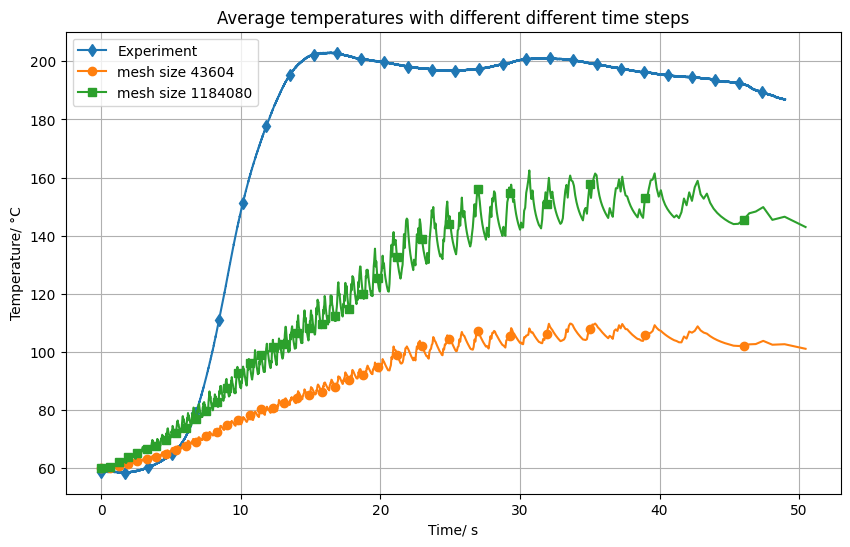

In [31]:
import os
import re
import pandas as pd
import matplotlib.pyplot as plt

# Define the function to extract the folder name from the file name
def extract_elements(file_name):
    match = re.search(r'e-(\d+)', file_name)
    if match:
        return int(match.group(1))
    return 0

# Source directory where the folders are located
source_dir = '/home/yanjun/Documents/FEM_results/three_points/mesh_sensitivity'

# List to store DataFrames for each folder
folder_dfs = []

# Iterate through each directory in the source directory
for folder in os.listdir(source_dir):
    folder_path = os.path.join(source_dir, folder)
    # Check if it's a directory
    if os.path.isdir(folder_path):
        # List to store DataFrames for each CSV file in the folder
        dfs = []
        # Iterate through each CSV file in the folder
        for file in os.listdir(folder_path):
            if file.endswith('.csv') and file.split('.')[0].isdigit():
                csv_file = os.path.join(folder_path, file)
                df = pd.read_csv(csv_file)
                # Assuming the CSV files have columns 'Time' and 'temperature'
                dfs.append(df[['Time', 'avg(f)']])
        # Concatenate all DataFrames into one for the folder
        combined_df = pd.concat(dfs)
        # Group by time step and calculate average temperature for each time step
        average_temps_per_timestep = combined_df.groupby('Time')['avg(f)'].mean()
        # Store the average temperatures for the folder
        folder_dfs.append({'Folder': extract_elements(folder), 'Average Temperatures': average_temps_per_timestep})

# Sort folder_dfs by 'Folder' for plotting
folder_dfs.sort(key=lambda x: x['Folder'])


# Plotting
i = 0
marker_styles = ['o', 's', '^', 'v', '>', '<' ] 
plt.figure(figsize=(10, 6))

df1 = pd.read_csv('/home/yanjun/Documents/FEniCSx/Projecct/Data/experiment_result.csv')
T_e_ave = ( df1.iloc[:,1] + df1.iloc[:,3] + df1.iloc[:,5] ) /3
num_total = len(T_e_ave)
t_e = np.linspace (0, 49, num_total)
plt.plot(t_e, T_e_ave, label= "Experiment",marker='d',markevery=1000)

for folder_data in folder_dfs:
    plt.plot(folder_data['Average Temperatures'], label=f'mesh size {folder_data["Folder"]}', marker= marker_styles[i],markevery=35)
    i = i+1

plt.xlabel('Time/ s')
plt.ylabel('Temperature/ °C')
plt.title('Average temperatures with different different time steps')
plt.legend()
plt.grid(True)
plt.savefig('T_ave_time_step.png')
plt.show()


### 2.1 average temperature

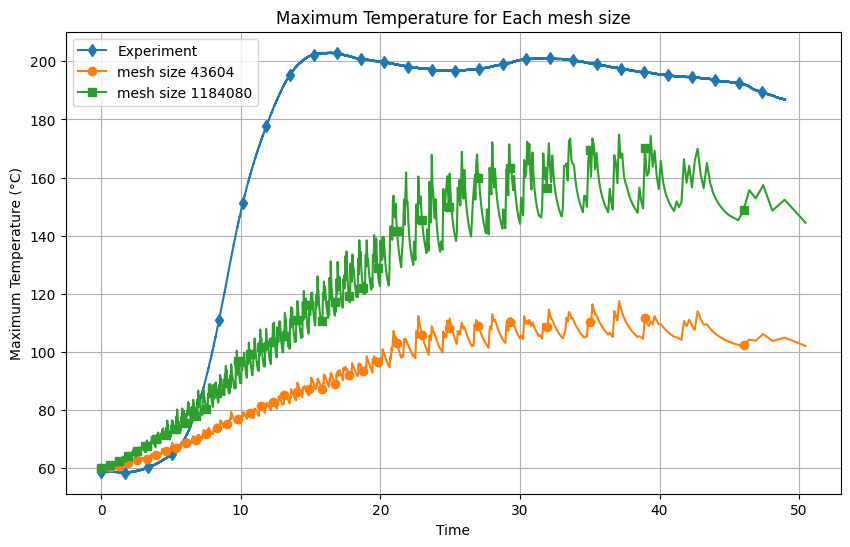

In [32]:
import os
import re
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Define the function to extract the folder name from the file name
def extract_elements(file_name):
    match = re.search(r'e-(\d+)', file_name)
    if match:
        return int(match.group(1))
    return 0

# Source directory where the folders are located
source_dir = '/home/yanjun/Documents/FEM_results/three_points/mesh_sensitivity/'

# List to store maximum temperatures for each folder
folder_max_temps = []

# Iterate through each directory in the source directory
for folder in os.listdir(source_dir):
    folder_path = os.path.join(source_dir, folder)
    # Check if it's a directory
    if os.path.isdir(folder_path):
        # Read all CSV files in the folder and concatenate them into one DataFrame
        df_list = []
        for file in os.listdir(folder_path):
            if file.endswith('.csv') and file.split('.')[0].isdigit():
                csv_file = os.path.join(folder_path, file)
                df = pd.read_csv(csv_file)
                df_list.append(df)
        combined_df = pd.concat(df_list)
        # Group by 'Time' and find the maximum temperature for each time step
        max_temps_per_timestep = combined_df.groupby('Time')['avg(f)'].max()
        # Store the maximum temperatures for the folder
        folder_max_temps.append({'Folder': extract_elements(folder), 'Max Temperatures': max_temps_per_timestep})

# Sort folder_max_temps by 'Folder' for plotting
folder_max_temps.sort(key=lambda x: x['Folder'])

# Plotting
plt.figure(figsize=(10, 6))

df1 = pd.read_csv('/home/yanjun/Documents/FEniCSx/Projecct/Data/experiment_result.csv')
T_e_ave = ( df1.iloc[:,1] + df1.iloc[:,3] + df1.iloc[:,5] ) /3
num_total = len(T_e_ave)
t_e = np.linspace (0, 49, num_total)
plt.plot(t_e, T_e_ave, label= "Experiment",marker='d',markevery=1000)
i = 0
marker_styles = ['o', 's', '^', 'v', '>', '<' ] 

for folder_data in folder_max_temps:
    plt.plot(folder_data['Max Temperatures'], label=f'mesh size {folder_data["Folder"]}', marker= marker_styles[i],markevery=35)
    i = i+1

plt.xlabel('Time')
plt.ylabel('Maximum Temperature (°C)')
plt.title('Maximum Temperature for Each mesh size')
plt.legend()
plt.grid(True)
plt.savefig('max_temp_time_step.png')
plt.show()


### 2.2 maximum temperature

## 3: contact area

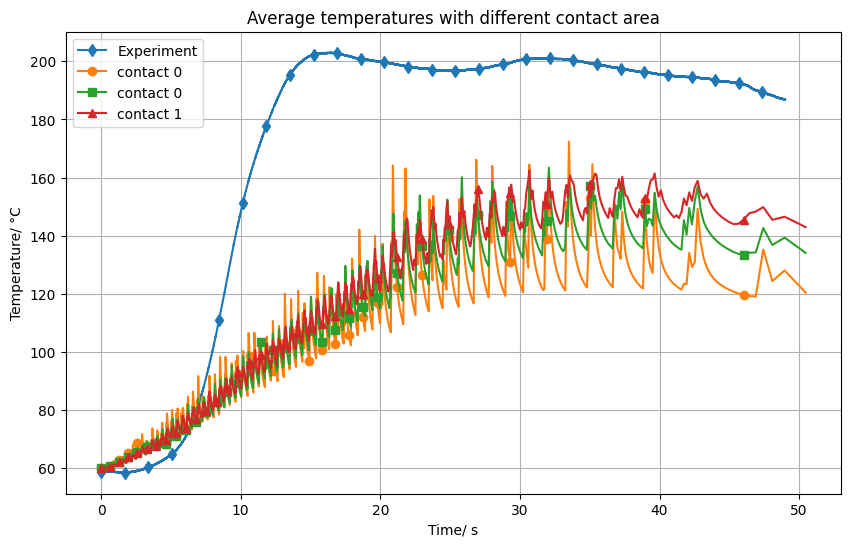

In [33]:
import os
import re
import pandas as pd
import matplotlib.pyplot as plt

# Define the function to extract the folder name from the file name
def extract_elements(file_name):
    match = re.search(r'c-(\d+)', file_name)
    if match:
        return int(match.group(1))
    return 0

# Source directory where the folders are located
source_dir = '/home/yanjun/Documents/FEM_results/three_points/contact_area'

# List to store DataFrames for each folder
folder_dfs = []

# Iterate through each directory in the source directory
for folder in os.listdir(source_dir):
    folder_path = os.path.join(source_dir, folder)
    # Check if it's a directory
    if os.path.isdir(folder_path):
        # List to store DataFrames for each CSV file in the folder
        dfs = []
        # Iterate through each CSV file in the folder
        for file in os.listdir(folder_path):
            if file.endswith('.csv') and file.split('.')[0].isdigit():
                csv_file = os.path.join(folder_path, file)
                df = pd.read_csv(csv_file)
                # Assuming the CSV files have columns 'Time' and 'temperature'
                dfs.append(df[['Time', 'avg(f)']])
        # Concatenate all DataFrames into one for the folder
        combined_df = pd.concat(dfs)
        # Group by time step and calculate average temperature for each time step
        average_temps_per_timestep = combined_df.groupby('Time')['avg(f)'].mean()
        # Store the average temperatures for the folder
        folder_dfs.append({'Folder': extract_elements(folder), 'Average Temperatures': average_temps_per_timestep})

# Sort folder_dfs by 'Folder' for plotting
folder_dfs.sort(key=lambda x: x['Folder'])

# Plotting
i = 0
marker_styles = ['o', 's', '^', 'v', '>', '<' ] 
plt.figure(figsize=(10, 6))

df1 = pd.read_csv('/home/yanjun/Documents/FEniCSx/Projecct/Data/experiment_result.csv')
T_e_ave = ( df1.iloc[:,1] + df1.iloc[:,3] + df1.iloc[:,5] ) /3
num_total = len(T_e_ave)
t_e = np.linspace (0, 49, num_total)
plt.plot(t_e, T_e_ave, label= "Experiment",marker='d',markevery=1000)

for folder_data in folder_dfs:
    plt.plot(folder_data['Average Temperatures'], label=f'contact {folder_data["Folder"]}', marker= marker_styles[i],markevery=35)
    i = i+1

plt.xlabel('Time/ s')
plt.ylabel('Temperature/ °C')
plt.title('Average temperatures with different contact area')
plt.legend()
plt.grid(True)
plt.savefig('T_ave_time_step.png')
plt.show()


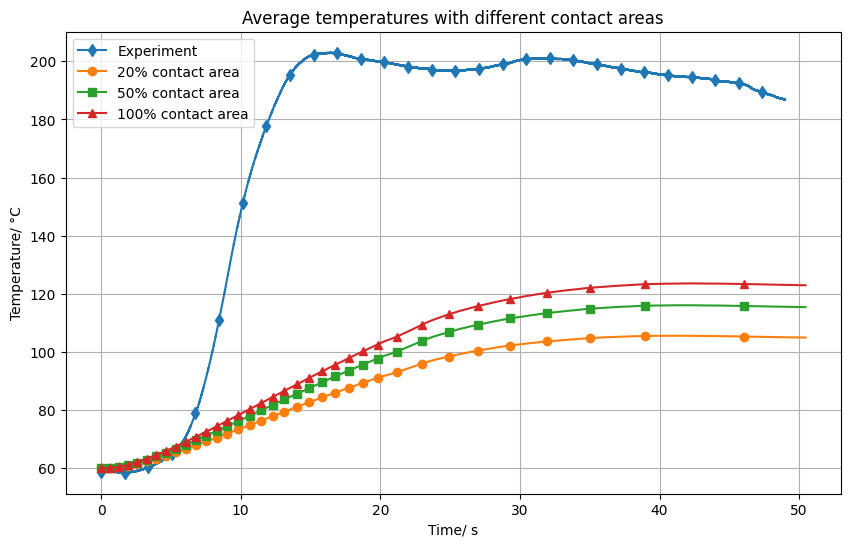

### 3.1 average temperature

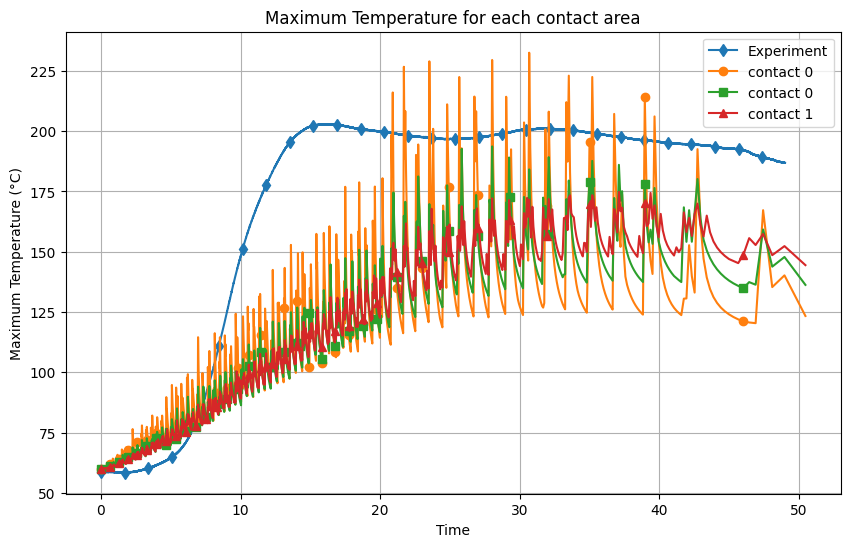

In [34]:
import os
import re
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Define the function to extract the folder name from the file name
def extract_elements(file_name):
    match = re.search(r'c-(\d+)', file_name)
    if match:
        return int(match.group(1))
    return 0

# Source directory where the folders are located
source_dir = '/home/yanjun/Documents/FEM_results/three_points/contact_area/'

# List to store maximum temperatures for each folder
folder_max_temps = []

# Iterate through each directory in the source directory
for folder in os.listdir(source_dir):
    folder_path = os.path.join(source_dir, folder)
    # Check if it's a directory
    if os.path.isdir(folder_path):
        # Read all CSV files in the folder and concatenate them into one DataFrame
        df_list = []
        for file in os.listdir(folder_path):
            if file.endswith('.csv') and file.split('.')[0].isdigit():
                csv_file = os.path.join(folder_path, file)
                df = pd.read_csv(csv_file)
                df_list.append(df)
        combined_df = pd.concat(df_list)
        # Group by 'Time' and find the maximum temperature for each time step
        max_temps_per_timestep = combined_df.groupby('Time')['avg(f)'].max()
        # Store the maximum temperatures for the folder
        folder_max_temps.append({'Folder': extract_elements(folder), 'Max Temperatures': max_temps_per_timestep})

# Sort folder_max_temps by 'Folder' for plotting
folder_max_temps.sort(key=lambda x: x['Folder'])

# Plotting
plt.figure(figsize=(10, 6))

df1 = pd.read_csv('/home/yanjun/Documents/FEniCSx/Projecct/Data/experiment_result.csv')
T_e_ave = ( df1.iloc[:,1] + df1.iloc[:,3] + df1.iloc[:,5] ) /3
num_total = len(T_e_ave)
t_e = np.linspace (0, 49, num_total)
plt.plot(t_e, T_e_ave, label= "Experiment",marker='d',markevery=1000)
i = 0
marker_styles = ['o', 's', '^', 'v', '>', '<' ] 

for folder_data in folder_max_temps:
    plt.plot(folder_data['Max Temperatures'], label=f'contact {folder_data["Folder"]}', marker= marker_styles[i],markevery=35)
    i = i+1

plt.xlabel('Time')
plt.ylabel('Maximum Temperature (°C)')
plt.title('Maximum Temperature for each contact area')
plt.legend()
plt.grid(True)
plt.savefig('max_temp_time_step.png')
plt.show()


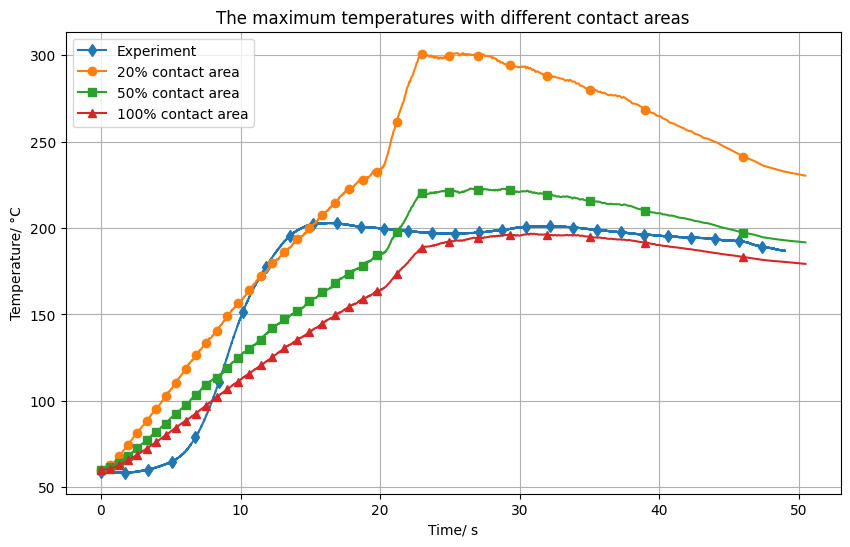

In [6]:
plt.figure(figsize=(10, 6))

marker_styles = ['o', 's', '^', 'v', '>', '<' ] 

df1 = pd.read_csv('/home/yanjun/Documents/FEniCSx/Projecct/Data/experiment_result.csv')
T_e_ave = ( df1.iloc[:,1] + df1.iloc[:,3] + df1.iloc[:,5] ) /3
num_total = len(T_e_ave)
t_e = np.linspace (0, 49, num_total)
plt.plot(t_e, T_e_ave, label= "Experiment", marker='d',markevery=1000)

i = 0
for csv_file in csv_files:
    # Extract label from file name
    label = os.path.basename(csv_file).split("c-")[1].split("-")[0]  # Extract the part after "c-"
    if label == '1':
        label = '100% contact area'
    else:
        label = f"{int(float(label) * 100)}% contact area"  # Convert "0.2" to "20% contact area"
    
    # Read CSV file
    df = pd.read_csv(csv_file)
    
    # Extract data
    time_data = df.iloc[:, 1]  # Assuming time is in the second column (index 1)
    temperature_data = df.iloc[:, 3]  # Assuming temperature is in the third column (index 2)

    rolling_mean = temperature_data.rolling(window=50, min_periods=0).mean()
    
    # Plot data
    plt.plot(time_data, rolling_mean, label=label, marker= marker_styles[i],markevery=35)
    i += 1
     
    

plt.xlabel('Time/ s')
plt.ylabel('Temperature/ °C')
plt.title('The maximum temperatures with different contact areas')
plt.legend()
plt.grid(True)
plt.savefig('T_max_contact.png')
plt.show()

### 3.2 maximum temperature